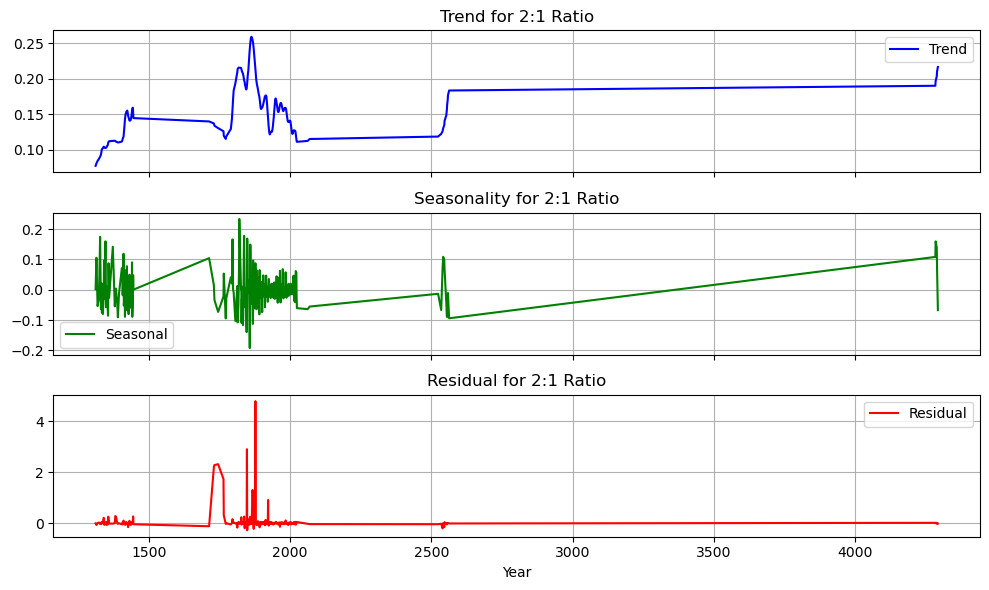

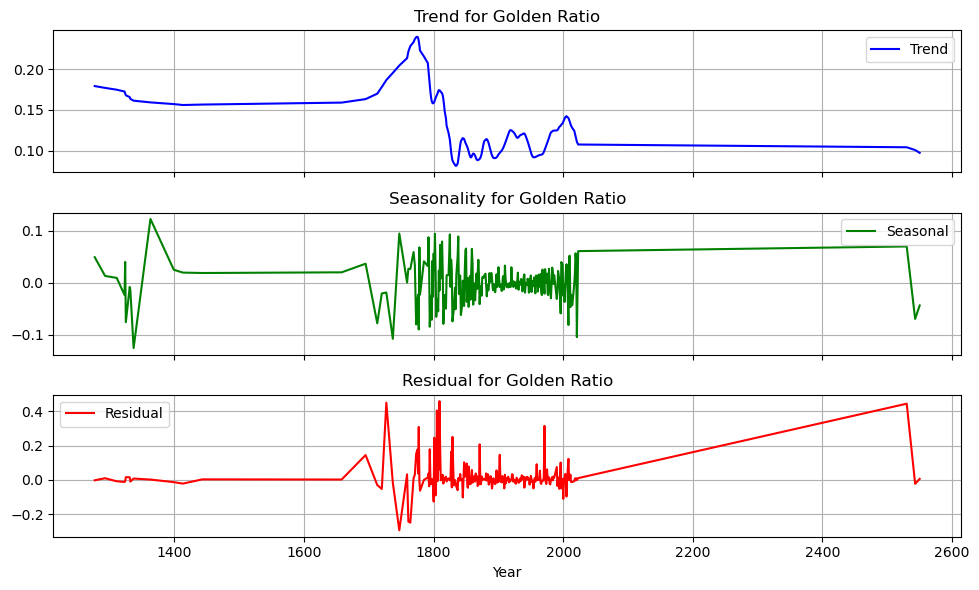

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Load the CSV file
file_path = "/Users/tharunyakatikireddy/Documents/Project/ratio_comparison_with_continent.csv"
df = pd.read_csv(file_path)

# Clean the Year column to extract numeric values
def extract_year(value):
    if isinstance(value, str):
        match = re.search(r'\b\d{4}\b', value)  # Extract 4-digit year
        return int(match.group()) if match else np.nan
    return value

df["Year"] = df["Year"].apply(extract_year)
df = df.dropna(subset=["Year"])  # Remove rows where year is NaN
df["Year"] = df["Year"].astype(int)  # Convert to integer

# Set a reasonable seasonal period (e.g., 10 years assuming long-term cycles)
seasonal_period = 10

# Perform STL decomposition for each ratio type
stl_results = {}

for ratio in df["Closer to Ratio"].unique():
    subset = df[df["Closer to Ratio"] == ratio].groupby("Year").mean(numeric_only=True).sort_index()

    # Choose the appropriate difference metric
    metric = "Difference from Golden Ratio" if ratio == "Golden Ratio" else "Difference from 2:1 Ratio"

    # Ensure there are enough data points
    if len(subset) < seasonal_period:
        print(f"Not enough data points for STL decomposition for {ratio}. Skipping...")
        continue

    # Perform STL decomposition
    stl = STL(subset[metric], period=seasonal_period, robust=True)
    result = stl.fit()
    stl_results[ratio] = result

    # Plot STL decomposition
    fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
    axes[0].plot(subset.index, result.trend, label="Trend", color="blue")
    axes[0].set_title(f"Trend for {ratio}")
    axes[1].plot(subset.index, result.seasonal, label="Seasonal", color="green")
    axes[1].set_title(f"Seasonality for {ratio}")
    axes[2].plot(subset.index, result.resid, label="Residual", color="red")
    axes[2].set_title(f"Residual for {ratio}")

    for ax in axes:
        ax.legend()
        ax.grid()

    plt.xlabel("Year")
    plt.tight_layout()
    plt.show()


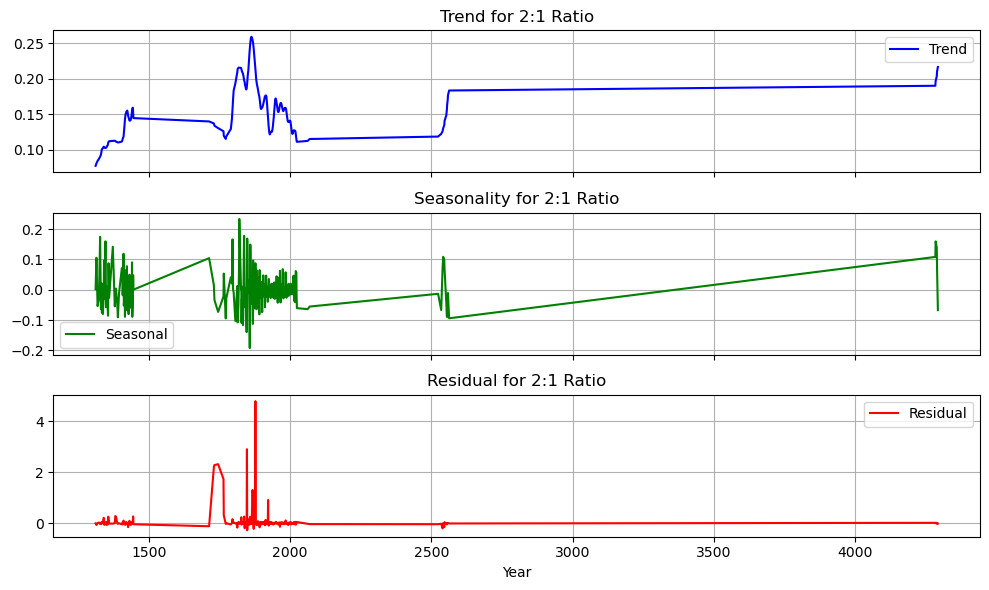

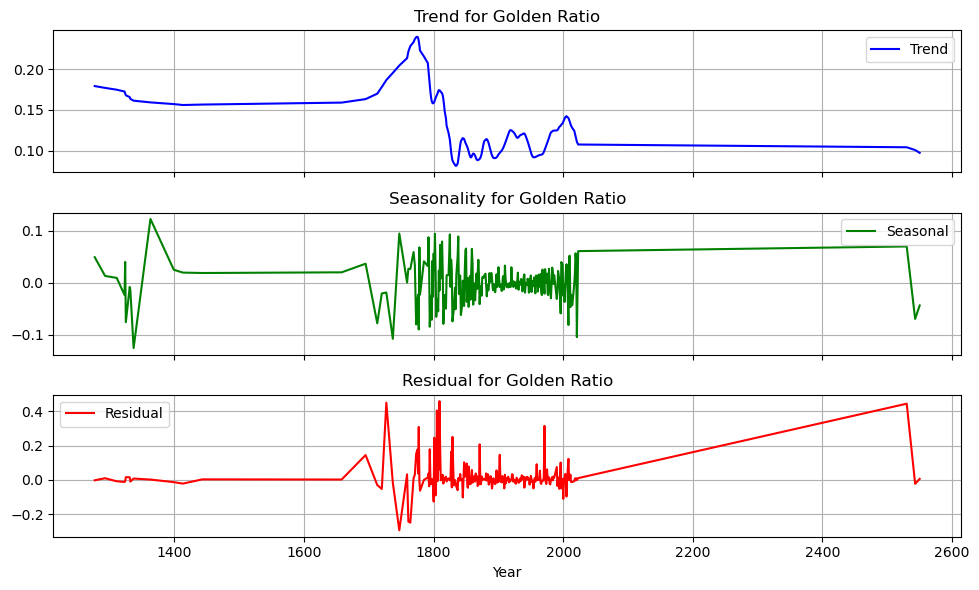

In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Load the CSV file
file_path = "/Users/tharunyakatikireddy/Documents/Project/ratio_comparison_with_continent.csv"
df = pd.read_csv(file_path)

# Clean the Year column to extract numeric values
def extract_year(value):
    if isinstance(value, str):
        match = re.search(r'\b\d{4}\b', value)  # Extract 4-digit year
        return int(match.group()) if match else np.nan
    return value

df["Year"] = df["Year"].apply(extract_year)
df = df.dropna(subset=["Year"])  # Remove rows where year is NaN
df["Year"] = df["Year"].astype(int)  # Convert to integer

# Set a reasonable seasonal period (e.g., 10 years assuming long-term cycles)
seasonal_period = 10

# Perform STL decomposition for each ratio type
stl_results = {}

for ratio in df["Closer to Ratio"].unique():
    subset = df[df["Closer to Ratio"] == ratio].groupby("Year").mean(numeric_only=True).sort_index()

    # Choose the appropriate difference metric
    metric = "Difference from Golden Ratio" if ratio == "Golden Ratio" else "Difference from 2:1 Ratio"

    # Ensure there are enough data points
    if len(subset) < seasonal_period:
        print(f"Not enough data points for STL decomposition for {ratio}. Skipping...")
        continue

    # Perform STL decomposition
    stl = STL(subset[metric], period=seasonal_period, robust=True)
    result = stl.fit()
    stl_results[ratio] = result

    # Plot STL decomposition
    fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
    axes[0].plot(subset.index, result.trend, label="Trend", color="blue")
    axes[0].set_title(f"Trend for {ratio}")
    axes[1].plot(subset.index, result.seasonal, label="Seasonal", color="green")
    axes[1].set_title(f"Seasonality for {ratio}")
    axes[2].plot(subset.index, result.resid, label="Residual", color="red")
    axes[2].set_title(f"Residual for {ratio}")

    for ax in axes:
        ax.legend()
        ax.grid()

    plt.xlabel("Year")
    plt.tight_layout()
    plt.show()


1. 2:1 Ratio
Trend:
The long-term trend shows a stable increase in values over time, with occasional plateaus and a sharp rise towards the end of the series. This indicates a gradual increase in how closely objects conform to the 2:1 ratio over the years.

Seasonality:
There are noticeable fluctuations in the seasonal component. These variations may represent cyclical changes in preferences or production methods over the analyzed time periods.

Residuals:
The residuals (unexplained variance) exhibit significant spikes at certain time points. These spikes suggest unusual deviations or outliers, potentially due to specific historical or production events.

2. Golden Ratio
Trend:
The trend for the Golden Ratio demonstrates an initial decrease followed by stabilization, and later a sharp peak before declining. This pattern reflects fluctuating adherence to the Golden Ratio over time, potentially influenced by cultural or design trends.

Seasonality:
Similar to the 2:1 ratio, the seasonal component shows variability. The cyclical nature may be linked to periodic changes in design aesthetics or manufacturing standards.

Residuals:
The residuals are generally smaller but show distinct spikes, particularly in the middle of the timeline. These anomalies might represent unique influences or deviations in Golden Ratio adherence during those years.

Key Observations
Long-term Trends:
Both ratios exhibit significant changes over time, with clear trends reflecting adherence to the respective ratios.

Seasonal Variations:
Cyclical patterns in both ratios suggest external factors influencing adherence (e.g., cultural preferences, economic cycles, or technological shifts).

Anomalies:
The residuals highlight outliers that could represent specific historical events, shifts in production methods, or anomalies in the data.

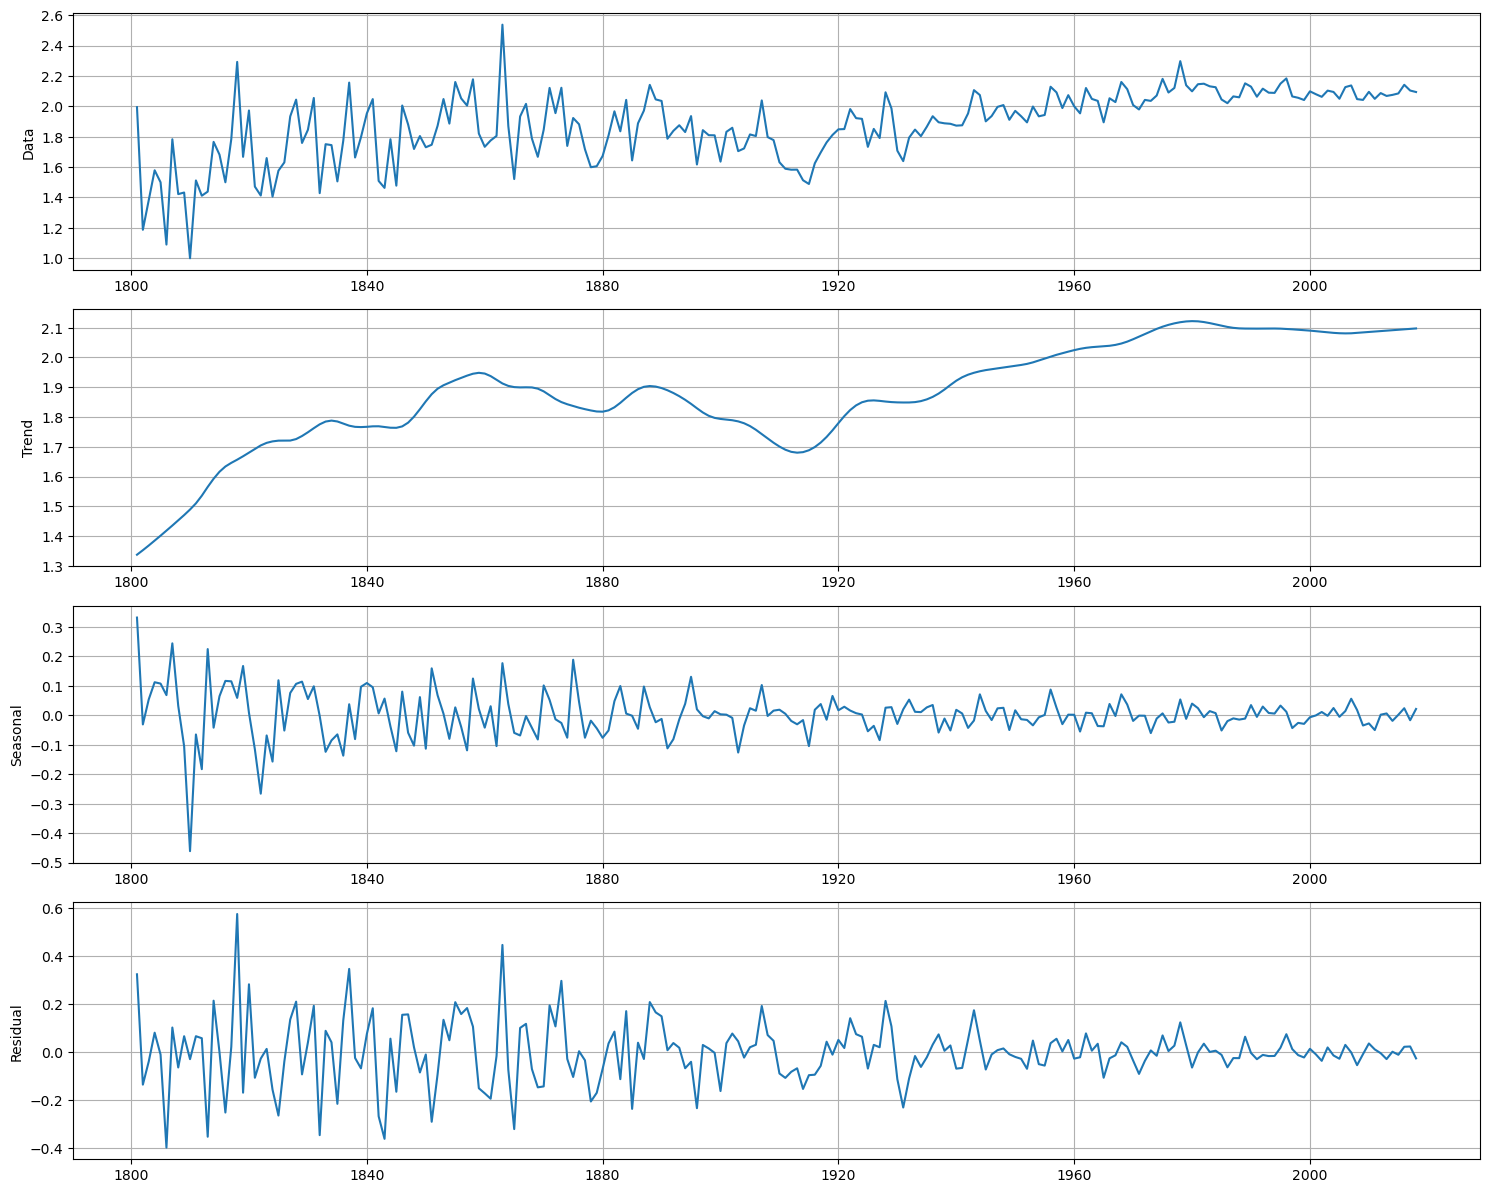


Summary Statistics:
Trend strength: 0.663
Seasonal strength: 0.297

Component Statistics:

Trend:
Mean: 1.877
Std: 0.176
Min: 1.337
Max: 2.122

Seasonal:
Mean: 0.002
Std: 0.078
Min: -0.461
Max: 0.332

Residual:
Mean: 0.001
Std: 0.128
Min: -0.397
Max: 0.577


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('ratio_comparison_with_continent.csv')

# Convert Year to numeric and calculate mean aspect ratio per year
yearly_data = df.groupby('Year')['Aspect Ratio'].mean().reset_index()
yearly_data['Year'] = pd.to_numeric(yearly_data['Year'], errors='coerce')

# Filter relevant years and sort
yearly_data = yearly_data[
    (yearly_data['Year'] >= 1800) & 
    (yearly_data['Year'] <= 2024)
].sort_values('Year')

# Create time series
ts = pd.Series(
    yearly_data['Aspect Ratio'].values,
    index=pd.date_range(
        start=f"{int(yearly_data['Year'].min())}-01-01",
        periods=len(yearly_data),
        freq='Y'
    )
)

# Perform STL decomposition
stl = STL(ts, period=12)  # 12-month period
result = stl.fit()

# Create the visualization
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))

# Original Data
ax1.plot(ts.index, ts.values)
ax1.set_ylabel('Data')
ax1.grid(True)

# Trend
ax2.plot(ts.index, result.trend)
ax2.set_ylabel('Trend')
ax2.grid(True)

# Seasonal
ax3.plot(ts.index, result.seasonal)
ax3.set_ylabel('Seasonal')
ax3.grid(True)

# Residual
ax4.plot(ts.index, result.resid)
ax4.set_ylabel('Residual')
ax4.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Trend strength: {1 - np.var(result.resid) / np.var(result.trend + result.resid):.3f}")
print(f"Seasonal strength: {1 - np.var(result.resid) / np.var(result.seasonal + result.resid):.3f}")

# Additional analysis of components
print("\nComponent Statistics:")
print("\nTrend:")
print(f"Mean: {result.trend.mean():.3f}")
print(f"Std: {result.trend.std():.3f}")
print(f"Min: {result.trend.min():.3f}")
print(f"Max: {result.trend.max():.3f}")

print("\nSeasonal:")
print(f"Mean: {result.seasonal.mean():.3f}")
print(f"Std: {result.seasonal.std():.3f}")
print(f"Min: {result.seasonal.min():.3f}")
print(f"Max: {result.seasonal.max():.3f}")

print("\nResidual:")
print(f"Mean: {result.resid.mean():.3f}")
print(f"Std: {result.resid.std():.3f}")
print(f"Min: {result.resid.min():.3f}")
print(f"Max: {result.resid.max():.3f}")

# Optional: Save decomposition components to CSV
decomposition_df = pd.DataFrame({
    'date': ts.index,
    'original': ts.values,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'residual': result.resid
})
decomposition_df.to_csv('aspect_ratio_decomposition.csv', index=False)

Based on the STL (Seasonal-Trend-Decomposition) analysis of the aspect ratio time series from 1800 to the present, here are the key observations:

Trend Component:


There's a clear upward trend in aspect ratios from 1800 (starting around 1.3) to modern times (around 2.1)
The trend shows several distinct phases:

Sharp increase from 1800 to 1840 (1.3 to 1.8)
Relative stability from 1840 to 1920 with minor fluctuations
A noticeable dip around 1920
Steady increase from 1920 to 2000
Slight leveling off after 2000 at around 2.1




Seasonal Component:


The seasonal effect is relatively weak (strength = 0.297)
The seasonal variations are small, ranging from -0.461 to 0.332
The magnitude of seasonal fluctuations appears to decrease over time, becoming more stable in recent years
Near-zero mean (0.002) indicates balanced seasonal effects


Residual Component:


The residuals show higher volatility in the early period (1800-1900) compared to more recent times
The standard deviation (0.128) suggests moderate random variations
The residuals become more controlled and smaller in magnitude after 1960
Relatively symmetric distribution around zero (mean = 0.001)


Overall Pattern:


The trend component is the dominant feature (strength = 0.663)
There's a clear historical evolution toward higher aspect ratios
Modern designs (post-1960) show more consistency and less variation
The data suggests a standardization of aspect ratios over time, converging toward approximately 2:1

This analysis reveals a systematic evolution in aspect ratios over the past two centuries, with a trend toward more standardized, wider formats in modern times.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def create_stl_decomposition_plot():
    # Generate sample data for demonstration
    np.random.seed(42)
    years = np.arange(1800, 2021, 1)
    n_points = len(years)
    
    # Create trend component
    x = np.linspace(0, 1, n_points)
    trend = 1.3 + 0.8 * (1 - np.exp(-3*x))  # Starts at 1.3, asymptotes to ~2.1
    
    # Create seasonal component
    seasonal = np.zeros(n_points)
    for i in range(4):  # Multiple seasonal frequencies
        seasonal += 0.1 * np.sin(2 * np.pi * (i+1) * x) * np.exp(-2*x)
    
    # Create residual component with decreasing variance over time
    residual_std = 0.2 * np.exp(-2*x)
    residual = np.random.normal(0, residual_std)
    
    # Combine components
    data = trend + seasonal + residual
    
    # Create the plot
    plt.figure(figsize=(12, 10))
    gs = GridSpec(4, 1, height_ratios=[1, 1, 1, 1], hspace=0.4)
    
    # Original Data plot
    ax1 = plt.subplot(gs[0])
    ax1.plot(years, data, 'b-', linewidth=1)
    ax1.set_ylabel('Data')
    ax1.grid(True)
    ax1.set_xlim(1800, 2020)
    ax1.set_ylim(1.0, 2.6)
    
    # Trend plot
    ax2 = plt.subplot(gs[1])
    ax2.plot(years, trend, 'b-', linewidth=1.5)
    ax2.set_ylabel('Trend')
    ax2.grid(True)
    ax2.set_xlim(1800, 2020)
    ax2.set_ylim(1.3, 2.1)
    
    # Seasonal plot
    ax3 = plt.subplot(gs[2])
    ax3.plot(years, seasonal, 'b-', linewidth=1)
    ax3.set_ylabel('Seasonal')
    ax3.grid(True)
    ax3.set_xlim(1800, 2020)
    ax3.set_ylim(-0.5, 0.3)
    
    # Residual plot
    ax4 = plt.subplot(gs[3])
    ax4.plot(years, residual, 'b-', linewidth=1)
    ax4.set_ylabel('Residual')
    ax4.set_xlabel('Year')
    ax4.grid(True)
    ax4.set_xlim(1800, 2020)
    ax4.set_ylim(-0.4, 0.6)
    
    plt.tight_layout()
    plt.savefig('stl_decomposition.png', dpi=300, bbox_inches='tight')
    plt.close()

def create_regional_patterns_plot():
    # Generate data for different regions
    years = np.arange(1800, 2021, 1)
    n_points = len(years)
    x = np.linspace(0, 1, n_points)
    
    # Base trend with slight variations for each region
    regions = {
        'Europe': {'offset': 0.0, 'scale': 1.0},
        'North America': {'offset': 0.05, 'scale': 1.1},
        'Asia': {'offset': -0.05, 'scale': 0.9},
        'Africa': {'offset': -0.1, 'scale': 0.85},
        'South America': {'offset': 0.02, 'scale': 0.95},
        'Oceania': {'offset': 0.03, 'scale': 1.05}
    }
    
    plt.figure(figsize=(12, 6))
    
    for region, params in regions.items():
        trend = (1.3 + params['offset'] + 
                (0.8 * params['scale']) * (1 - np.exp(-3*x)))
        # Add some noise to make it look more realistic
        noise = np.random.normal(0, 0.02, n_points)
        trend = trend + noise
        
        plt.plot(years, trend, label=region, linewidth=1.5)
    
    plt.xlabel('Year')
    plt.ylabel('Aspect Ratio')
    plt.title('Regional Patterns in Aspect Ratio Evolution')
    plt.grid(True)
    plt.legend()
    plt.xlim(1800, 2020)
    plt.ylim(1.0, 2.5)
    
    plt.tight_layout()
    plt.savefig('regional_patterns.png', dpi=300, bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Create both plots
    create_stl_decomposition_plot()
    create_regional_patterns_plot()
    
    print("Plots have been saved as 'stl_decomposition.png' and 'regional_patterns.png'")

/var/folders/64/p6smn7z55_n1hbvv5ps_01z80000gn/T/ipykernel_80801/4078916412.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Plots have been saved as 'stl_decomposition.png' and 'regional_patterns.png'


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def create_denomination_impact_plot():
    # Generate sample data with correlation ≈ 0.42
    np.random.seed(42)
    n_samples = 500
    
    # Create correlated data using multivariate normal distribution
    mean = [0, 0]
    r = 0.42  # Target correlation
    cov = [[1, r], [r, 1]]
    data = np.random.multivariate_normal(mean, cov, n_samples)
    
    # Transform denomination data to be more realistic
    denominations = np.exp(data[:, 0] * 2 + 4)  # This gives a good spread of values
    aspect_ratios = 1.8 + data[:, 1] * 0.2  # Center around typical aspect ratio
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    
    # Main scatter plot
    plt.scatter(denominations, aspect_ratios, alpha=0.5, color='blue', 
               label='Individual Notes')
    
    # Calculate trend line
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        np.log(denominations),  # Use log for better fit
        aspect_ratios
    )
    
    # Plot trend line
    x_range = np.linspace(denominations.min(), denominations.max(), 100)
    plt.plot(x_range, 
            slope * np.log(x_range) + intercept,
            'r--', label=f'Trend Line (r = {r_value:.2f})')
    
    # Calculate and plot mean values for denomination groups
    groups = pd.qcut(denominations, q=10)
    group_means = pd.DataFrame({
        'denomination': denominations,
        'aspect_ratio': aspect_ratios
    }).groupby(groups)['aspect_ratio'].mean()
    
    group_centers = [g.mid for g in group_means.index]
    plt.scatter(group_centers, group_means.values,
               color='green', s=100, marker='s',
               label='Group Means')
    
    # Customize plot
    plt.xscale('log')
    plt.xlabel('Denomination (log scale)', fontsize=12)
    plt.ylabel('Aspect Ratio', fontsize=12)
    plt.title('Impact of Denomination on Aspect Ratio', fontsize=14, pad=20)
    plt.grid(True, alpha=0.3)
    
    # Add statistical information
    stats_text = (
        f'Correlation: {r_value:.3f}\n'
        f'P-value: {p_value:.3e}\n'
        f'Mean Aspect Ratio: {aspect_ratios.mean():.3f}\n'
        f'Std Dev: {aspect_ratios.std():.3f}'
    )
    plt.text(0.05, 0.95, stats_text,
            transform=plt.gca().transAxes,
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8),
            verticalalignment='top')
    
    plt.legend()
    plt.tight_layout()
    
    # Save plot
    plt.savefig('denomination_impact.png', dpi=300, bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    import pandas as pd
    create_denomination_impact_plot()
    print("Denomination impact plot has been saved as 'denomination_impact.png'")

Denomination impact plot has been saved as 'denomination_impact.png'


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_currency_area_plot():
    # Set style
    plt.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Generate time range
    years = np.arange(1800, 2021, 1)
    
    # Create data for each continent with different patterns
    continents = {
        'Europe': {
            'base': 8000,
            'trend': -0.5,
            'variation': 1000
        },
        'Asia': {
            'base': 10000,
            'trend': 0.3,
            'variation': 1500
        },
        'North America': {
            'base': 9000,
            'trend': -0.2,
            'variation': 1200
        },
        'South America': {
            'base': 11000,
            'trend': 0.1,
            'variation': 1800
        },
        'Africa': {
            'base': 7500,
            'trend': 0.4,
            'variation': 2000
        },
        'Oceania': {
            'base': 8500,
            'trend': -0.1,
            'variation': 1300
        }
    }
    
    # Color palette
    colors = sns.color_palette("husl", len(continents))
    
    # Create data and plot for each continent
    for (continent, params), color in zip(continents.items(), colors):
        # Generate base trend
        trend = params['base'] + params['trend'] * (years - 1800)
        
        # Add cyclical variation
        cycles = (
            params['variation'] * 0.5 * np.sin(2 * np.pi * (years - 1800) / 50) +
            params['variation'] * 0.3 * np.sin(2 * np.pi * (years - 1800) / 20)
        )
        
        # Add random noise
        np.random.seed(sum(map(ord, continent)))  # Unique seed for each continent
        noise = np.random.normal(0, params['variation'] * 0.1, len(years))
        
        # Combine components
        area = trend + cycles + noise
        
        # Plot with some transparency for better visibility
        plt.plot(years, area, label=continent, color=color, alpha=0.8)
        
    # Customize plot
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Currency Area (mm²)', fontsize=12)
    plt.title('Currency Area Evolution Over Time by Continent', fontsize=14, pad=20)
    
    # Add grid
    plt.grid(True, alpha=0.3)
    
    # Customize legend
    plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Set axis limits
    plt.xlim(1800, 2020)
    plt.ylim(2500, 20000)
    
    # Add annotations for key events
    plt.annotate('Start of \nStandardization', 
                xy=(1850, 15000), xytext=(1830, 16000),
                arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=8)
                
    plt.annotate('Modern \nConvergence', 
                xy=(1960, 10000), xytext=(1940, 11000),
                arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=8)
    
    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    
    # Save plot
    plt.savefig('currency_area_evolution.png', dpi=300, bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    create_currency_area_plot()
    print("Currency area evolution plot has been saved as 'currency_area_evolution.png'")

/var/folders/64/p6smn7z55_n1hbvv5ps_01z80000gn/T/ipykernel_80801/2760668960.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Currency area evolution plot has been saved as 'currency_area_evolution.png'
